In [1]:
#Needed in general
import sys

#Quick fudge to make import from ../Scripts work
sys.path.append('../../../common_code')
from PostProcessingScripts import * 
# from ClassFormationChannels_5mainchannels import * 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



colors = ['#1f77b4', '#ff7f0e']
colors_lighter = [adjust_lightness(color=colors[0], amount=2.2),adjust_lightness(color=colors[1], amount=1.7)]

from formation_channels import * 
# Generate a distribution and draw 2**6 data points


obtain index of the SFRD models that we want to highlight


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

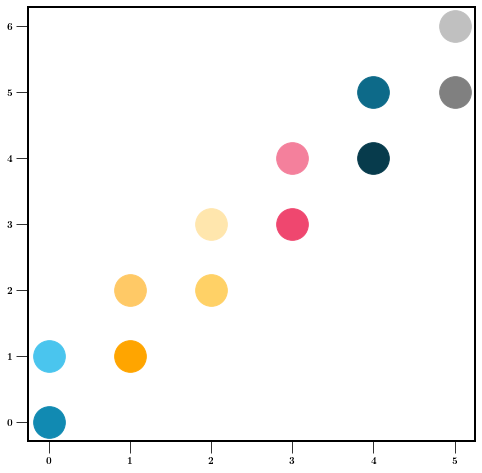

In [2]:
fig, ax = plt.subplots(1,1, figsize=(8,8))





channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'orange',  'immediate CE': '#EF476F'  , r'double-core CE':'#073B4C', 'other':'gray', 'vi':'cyan', 'vii':'#FFD166'}
List_formationchannelOptions = ['All',  'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'vi', 'vii', 'other']
ind_formationchannelOptions = [7,  1, 2, 3, 4, 5, 6, 0]
dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}



# channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
channelColorDict_lighter = {'classic':adjust_lightness(color='#118AB2', amount=1.6),'stable B no CEE':adjust_lightness(color='orange', amount=1.4), 'immediate CE':adjust_lightness(color='#EF476F', amount=1.2),\
                            r'double-core CE':adjust_lightness(color='#073B4C', amount=1.8), 'other':adjust_lightness(color='gray', amount=1.5),  'vi':adjust_lightness(color='cyan', amount=1.5), 'vii':adjust_lightness(color='#FFD166', amount=1.2)}
channelList = ['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other'] #, 'vi']

for nrC, Channel in enumerate(channelList): 

    c_FC = channelColorDict[Channel]
    colors_lighter_FC =  adjust_lightness(color=c_FC, amount=1.6)
    
    plt.scatter([nrC], [nrC], s=1000, c=c_FC)
    plt.scatter([nrC], [nrC+1], s=1000, c=channelColorDict_lighter[Channel])
    
plt.show()
    
    
    
    


In [25]:




def plot_FC_distribution(axe='None', xparam='chiEff', BPSmodelName='A', mode='pdf',\
                          spin_threshold='None', bw=0.01, xlim=[0,1], ylim=[0,1],\
                          plotYlog='False', ylim_threshold=0.02):#, mssfr='112'):
    
    fs_l = 28 # label fontsize
    
#     colors = ['#1f77b4', '#ff7f0e']
#     colors_lighter = [adjust_lightness(color=colors[0], amount=2.2),adjust_lightness(color=colors[1], amount=1.7)]

    DCOtype='BHNS'
    # path for files 
    path_ = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
    
    fdata = h5.File(path, 'r')
    massCO_ZAMSM1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
    massCO_ZAMSM2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
    # M1 will be the most massive, M2 the least massive compact object. 
    massCO_LVKM1, massCO_LVKM2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    MassRatioCO_LVK = massCO_LVKM2/massCO_LVKM1
    
    seedsDCO  = fdata['doubleCompactObjects']['seed'][...].squeeze()  # get the seeds in the DCO file 
    seedsSN   = fdata['supernovae']['randomSeed'][...].squeeze()    # get the seeds in the SN file 
    indices   = np.sort(np.unique(seedsSN[1::2], return_index=True)[1])
    maskSNdco = np.in1d(seedsSN,  seedsDCO) # mask in the SNe files the SNe that correspond to our DCO
    whichSN   = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]  # this is 1 if the initially primary star goes SN and 2 if the secondary goes supernova     
    whichSN2  = whichSN[1::2][indices]

    # either SN2 = primary (1) and M1 is > M2, or SN2 = secondary & M1 < M2 
    # this takes into account (first term) rejuvenation 
    mask_MRR = ((whichSN2==1) & (massCO_ZAMSM1>massCO_ZAMSM2) ) | ((whichSN2==2) & (massCO_ZAMSM1<massCO_ZAMSM2)) 

    
    
    # obtain formation channels 
    seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
    channels = identify_formation_channels(seeds=seeds, file=fdata)
    
    
    
    del massCO_ZAMSM1
    del massCO_ZAMSM2
    del whichSN2
    del whichSN
    del maskSNdco
    del indices
    del seedsSN
    del seedsDCO


    
    if (mode in ['spin_PDF', 'spin_fraction', 'spinOne_fraction', 'spinTwo_fraction', 'm1spin_or_m2spin_fraction', 'spin_CDF' ]) | (xparam in ['chi_of_spinning_BH', 'chi_effective', 'log10_t_delay']):
        spin = COspin(data_path=path, state='he_depletion')  # set class 
        spin.setCOMPASData() # reads in the COMPAS DCO parameters 
        spinZAMSM1, spinZAMSM2  = spin.BaveraSpin() #ZAMS M1 SPIN 

        spinLVKM1, spinLVKM2 = np.zeros_like(spinZAMSM1), np.zeros_like(spinZAMSM1)
        spinLVKM1[mask_MRR] = spinZAMSM2[mask_MRR]  # MRR so M1 comes from M2ZAMS, we assign it spin from M2ZAMS
        spinLVKM1[~mask_MRR] = spinZAMSM1[~mask_MRR]  # no MRR so M1 comes from M1ZAMS, we assign it spin from M1ZAMS
        spinLVKM2[mask_MRR] = spinZAMSM1[mask_MRR]   # MRR so M2 comes from M1ZAMS, we assign it spin from M1ZAMS
        spinLVKM2[~mask_MRR] = spinZAMSM2[~mask_MRR]   # no MRR so M2 comes from M2ZAMS, we assign it spin from M2ZAMS     

        # spin_threshold = 0.05 # definition of "spinning BH"
        mask_LVKM1_spinning = (spinLVKM1 > spin_threshold ) 
        mask_LVKM2_spinning = (spinLVKM2 > spin_threshold ) # definition of "spinning BH"
        mask_anySpin = (spinLVKM1 > spin_threshold ) | (spinLVKM2 > spin_threshold )    

    

    if xparam=='chirp_mass_LVK':
        param_x = chirpmass(massCO_LVKM1, massCO_LVKM2)
        nameX = r'$\mathcal{M}_{\rm{c}} \ [M_{\odot}]$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(1,30,1000)
        print(param_x)
        print(np.shape(param_x))
        
    elif xparam=='mass_ratio_LVK':
        param_x = MassRatioCO_LVK
        nameX = r'$q$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-0.2,1.2,1000)

        

    elif xparam=='mass_1_LVK':
        param_x = massCO_LVKM1
        nameX = r'$m_1 [M_{\odot}]$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-1,50,1000)
        print(param_x)
        print(np.shape(param_x))
        
    elif xparam=='chi_of_spinning_BH':
        param_x = spinLVKM1 + spinLVKM2

        nameX = r'$\chi_{\rm{i}}$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-0.2,2,1000)  

        
    elif xparam=='chi_effective':
        param_x = ((spinLVKM1*massCO_LVKM1) + (spinLVKM2*massCO_LVKM2)) / (massCO_LVKM1+massCO_LVKM2)
        nameX = r'$\chi_{\rm{eff}}$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-0.2,2,1000)          
        
    elif xparam=='log10_t_delay':
        param_x = (fdata['doubleCompactObjects']['tform'][...].squeeze() +  fdata['doubleCompactObjects']['tc'][...].squeeze() ) / 1000 # divide by 1000 to make it in [Gyr]
        param_x = np.log10(param_x)
        nameX = r'$t_{\rm{delay}} \ [\rm{Gyr}]$'
        nameY = r'\textbf{PDF}'  
        xx = np.linspace(-4,2,1000)  

    
    if (mode=='MRR_PDF') | (mode=='spin_PDF'):
        nameY = r'\textbf{PDF}'
    elif (mode=='MRR_fraction'):
        nameY = r'$\rm{f}_{\rm{channel}}$'
    elif (mode=='notMRR_fraction'):
        nameY = r'$\rm{f}_{\rm{non MRR}}$'
    elif (mode=='spin_fraction'):
        nameY =   r'$\rm{f}_{\chi_{1} > %s}$'%spin_threshold
    elif (mode=='m1spin_or_m2spin_fraction'):
        nameY =   r'$\rm{f}_{\chi_{\rm{i}} > %s}$'%spin_threshold 
    elif (mode=='MRR_CDF') | (mode=='spin_CDF'):
        nameY = r'\textbf{CDF}'
    elif (mode=='spinOne_fraction'):
        nameY =   r'$\rm{f}_{\chi_{1} > %s}$'%spin_threshold
    elif (mode=='spinTwo_fraction'):
        nameY =   r'$\rm{f}_{\chi_{2} > %s}$'%spin_threshold
    else:
        raise ValueError("the provided `mode` is not recognized, the value given is %s"%mode)
        
    
    estimator = FFTKDE(kernel='biweight', bw=bw)
    
    if plotYlog==True:       
        axe.set_yscale('log')
        
        
        
#     channelList = ['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other']
    adjustedChannelList = ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other']
#     adjustedChannelList = ['classic']#, 'stable B no CEE', 'immediate CE']#
    for nrC, Channel in enumerate(adjustedChannelList): 
        
        print('now at channel: ', Channel)
        ind_wanted = dictFormationChannelIndex[Channel]
        
        
        
        c_FC = channelColorDict[Channel]
        colors_lighter_FC =  channelColorDict_lighter[Channel]
#         print('now at channel', Channel)




        mask_MRR = (channels==ind_wanted)
    
        if len(mask_MRR)>0:
    
            for ind_mssfr, mssfr in enumerate(MSSFRnameslist[0:]):
#             for ind_mssfr, mssfr in enumerate(MSSFRnameslist[0:2]):    

                ls_ = '-'
                Highlight = False
                if ((mssfr in ['123']) & (BPSmodelName in ['K'])):
                    ls_ = ':'
                    Highlight = True
                elif  ((mssfr in ['312']) & (BPSmodelName in ['T'])):
                    ls_ = '--'
                    Highlight = True
                elif ((mssfr in ['231']) & (BPSmodelName in ['O'])):
                    ls_ = '-.'
                    Highlight = True




                ### read in MSSFR weights: ###
    #             fparam_key = 'weights_detected'
                fparam_key = 'weights_intrinsic'
                weightheader = 'w_' + mssfr
                weights_ = fdata[fparam_key][weightheader][...].squeeze()
                w = weights_
             

                if (mode=='MRR_PDF') | (mode=='MRR_fraction') |  (mode=='notMRR_fraction') : 
                    # we want at least 10 datapoint for KDE
                    if len(w[mask_MRR])>10:
                
                        yy_MRR = estimator.fit(param_x[mask_MRR], weights=w[mask_MRR]).evaluate(xx) 
                        yy_total = estimator.fit(param_x, weights=w).evaluate(xx) 
                        rel_weight_MRR    = np.sum(w[mask_MRR])  / (np.sum(w))
                        yy_MRR *= rel_weight_MRR
                    else:
                        print('%s data points for KDE, this is below the threshold 10, not drawing KDE'%len(w[mask_MRR]))



                ### PLOTTING ###
                ## IF WE ARE PLOTTING PDFs
                if (mode=='MRR_PDF') | (mode=='spin_PDF'):
                    if Highlight==True:
                        axe.plot(xx, yy_MRR,    color=c_FC, lw=3, zorder=16, alpha=1, ls=ls_)
                    else:
                        axe.plot(xx, yy_MRR,    color=colors_lighter_FC, lw=3, zorder=6, alpha=1, ls=ls_)

                    axe = layoutAxes(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=0, fontsize=fs_l, labelSizeMajor=fs_major)  



    if mode in [ 'MRR_fraction', 'notMRR_fraction', 'spinTwo_fraction', 'spinOne_fraction', 'm1spin_or_m2spin_fraction']:
        axe.set_yticks([ 0.5, 1])
    elif mode in ['MRR_CDF', 'spin_CDF']:
        axe.set_yticks([0.5, 0.75, 1])
        

            
    axe.set_xlim(xlim[0], xlim[1])
    axe.set_ylim(ylim[0], ylim[1])
    axe.grid(True)
    
    


    
    return axe 









## Loop over BPS models:

running model A
at mass_1_LVK
[ 3.74552  3.93168 13.4491  ...  4.06103  4.023    3.73859]
(1525553,)
now at channel:  classic
now at channel:  stable B no CEE
now at channel:  immediate CE
now at channel:  double-core CE
now at channel:  other


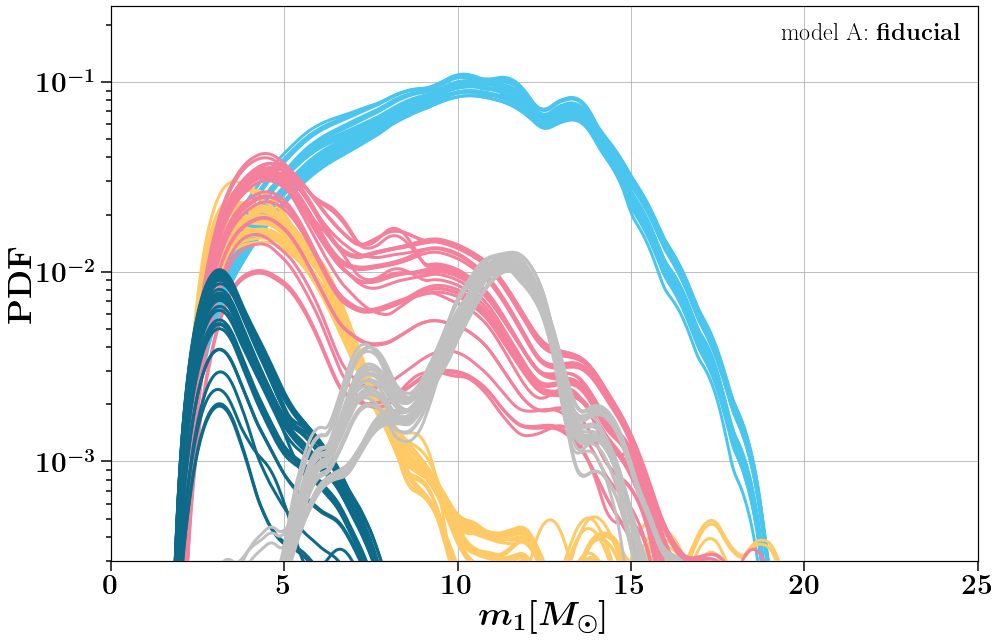

running model B
at mass_1_LVK
[ 3.74552 19.5813   3.2385  ...  4.45049  4.62636  4.61532]
(738537,)
now at channel:  classic
now at channel:  stable B no CEE
now at channel:  immediate CE
now at channel:  double-core CE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE

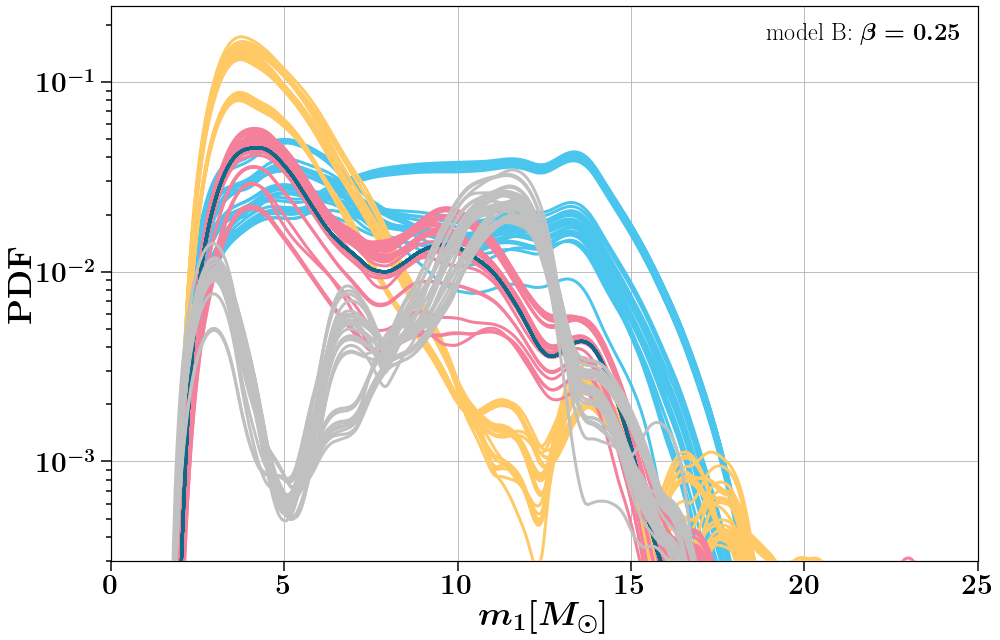

running model C
at mass_1_LVK
[3.74552 4.15584 4.98294 ... 7.48236 6.45174 2.84573]
(148043,)
now at channel:  classic
now at channel:  stable B no CEE
now at channel:  immediate CE
now at channel:  double-core CE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 data points for KDE, this is below the threshold 10, not drawing KDE
0 dat

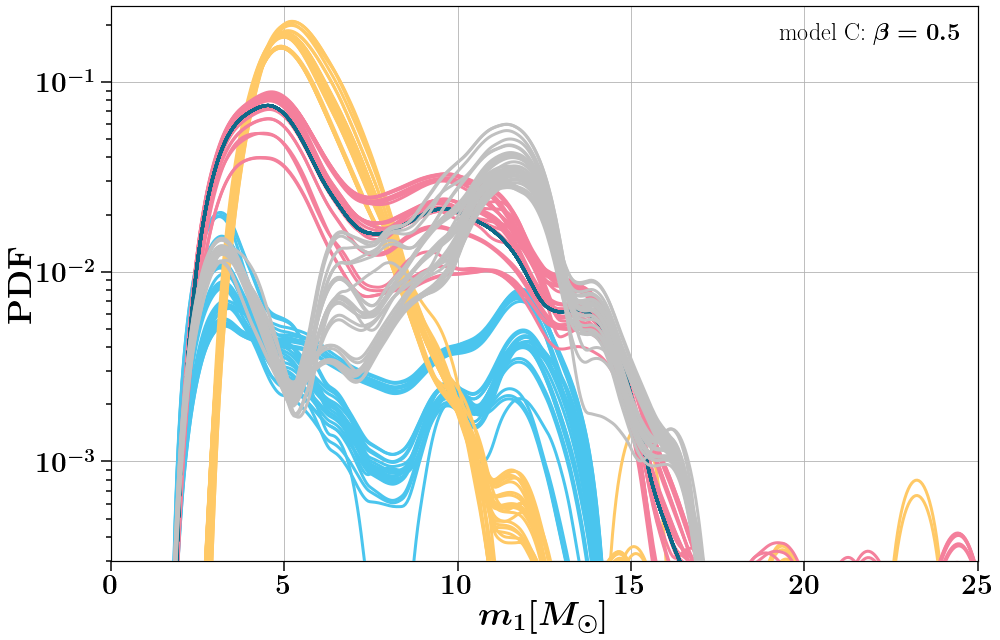

In [27]:
## writing here 






for ind_BPS, BPSmodel in enumerate(BPSnameslist[0:3]):

    fig, ax = plt.subplots(1,1, figsize=(14,9))#,\

    fs_major=34
    
    print('running model %s'%BPSmodel)
    
    s_text = r'model %s: '%BPSmodel + alphabetPhysicalNameDictWithEnter[BPSmodel]
    ax.text(0.98, 0.97, s=s_text , rotation = 0, fontsize=24, color = 'k', va='top', ha = 'right',transform=ax.transAxes)#, weight = 'bold')

    # CHIRP MASS 
    print('at mass_1_LVK')
#     print('at chirp mass')
    bw=0.40
    ylim_threshold = 0.0004       
    xparam = 'mass_1_LVK'
#     xparam = 'chirp_mass_LVK'
    plotYlog = False
    xlim, ylim = [0, 25], [0.0003, .25]

    plotYlog = True
#     ylim = [0.0003, 1.25]
    ax = plot_FC_distribution(axe=ax, xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)


#     xx = np.linspace(1000,20000,100)
#     yy = np.linspace(1000,20000,100)
#     lw=12
#     fs = 30

    # ax.plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
    # ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
    # ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')


    plt.tight_layout()  
    # plt.subplots_adjust(wspace=0.2, hspace=0.1)



    plt.savefig('./singlemodel/super_FC_split_panel_%s_BHNS.pdf'%BPSmodel, transparent=False, bbox_inches="tight",  format='pdf')
    plt.savefig('./singlemodel/super_FC_split_panel_%s_BHNS.png'%BPSmodel, transparent=False, bbox_inches="tight", dpi=600, format='png')
    plt.show()  











## all together

running model A
at mass_1_LVK
[33.4712  17.0417  14.9915  ...  5.15439  5.54399  5.15051]
(8371398,)
now at channel:  classic
now at channel:  stable B no CEE
now at channel:  immediate CE
now at channel:  double-core CE
now at channel:  other
running model B
at mass_1_LVK
[33.4712  16.4666  17.0417  ...  3.82374  3.96364  3.30498]
(8616008,)
now at channel:  classic
now at channel:  stable B no CEE
now at channel:  immediate CE
now at channel:  double-core CE
1 data points for KDE, this is below the threshold 10, not drawing KDE
1 data points for KDE, this is below the threshold 10, not drawing KDE
now at channel:  other


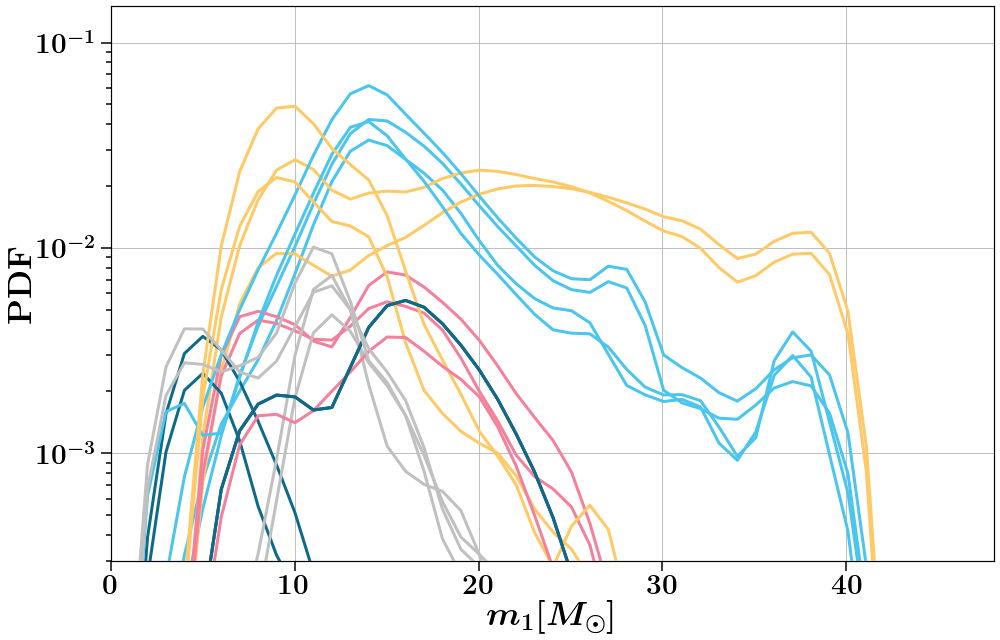

In [21]:
## writing here 



fig, ax = plt.subplots(1,1, figsize=(14,9))#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[0:2]):

# for ind_BPS, BPSmodel in enumerate(['A']):
    
    print('running model %s'%BPSmodel)
    
    
    # CHIRP MASS 
    print('at mass_1_LVK')
#     print('at chirp mass')
    bw=0.85
    ylim_threshold = 0.0004       
    xparam = 'mass_1_LVK'
#     xparam = 'chirp_mass_LVK'
    plotYlog = False
    xlim, ylim = [0, 48], [0.0, 2.03]

    plotYlog = True
    ylim = [0.0003, 0.15]
    ax = plot_FC_distribution(axe=ax, xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)






xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30

# ax[2,1].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
# ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
# ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')

    
plt.tight_layout()  
# plt.subplots_adjust(wspace=0.2, hspace=0.1)



# plt.savefig('./super_FC_split_panel.pdf', transparent=False, bbox_inches="tight",  format='pdf')
# plt.savefig('./super_FC_split_panel.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











running model A
at mass_1_LVK
[33.4712  17.0417  14.9915  ...  5.15439  5.54399  5.15051]
(8371398,)
now at channel:  classic
now at channel:  stable B no CEE
now at channel:  immediate CE
now at channel:  double-core CE
now at channel:  other
running model B
at mass_1_LVK
[33.4712  16.4666  17.0417  ...  3.82374  3.96364  3.30498]
(8616008,)
now at channel:  classic
now at channel:  stable B no CEE
now at channel:  immediate CE
now at channel:  double-core CE
1 data points for KDE, this is below the threshold 10, not drawing KDE
1 data points for KDE, this is below the threshold 10, not drawing KDE
1 data points for KDE, this is below the threshold 10, not drawing KDE
1 data points for KDE, this is below the threshold 10, not drawing KDE
1 data points for KDE, this is below the threshold 10, not drawing KDE
1 data points for KDE, this is below the threshold 10, not drawing KDE
1 data points for KDE, this is below the threshold 10, not drawing KDE
1 data points for KDE, this is below t

now at channel:  stable B no CEE
now at channel:  immediate CE
now at channel:  double-core CE
now at channel:  other
running model S
at mass_1_LVK
[34.0835 16.6095 17.194  ... 15.5899 16.1117 11.6128]
(8921965,)
now at channel:  classic
now at channel:  stable B no CEE
now at channel:  immediate CE
now at channel:  double-core CE
now at channel:  other
running model T
at mass_1_LVK
[31.6537 16.3921 14.485  ... 10.3747 11.1698 11.2274]
(6748472,)
now at channel:  classic
now at channel:  stable B no CEE
now at channel:  immediate CE
now at channel:  double-core CE
now at channel:  other


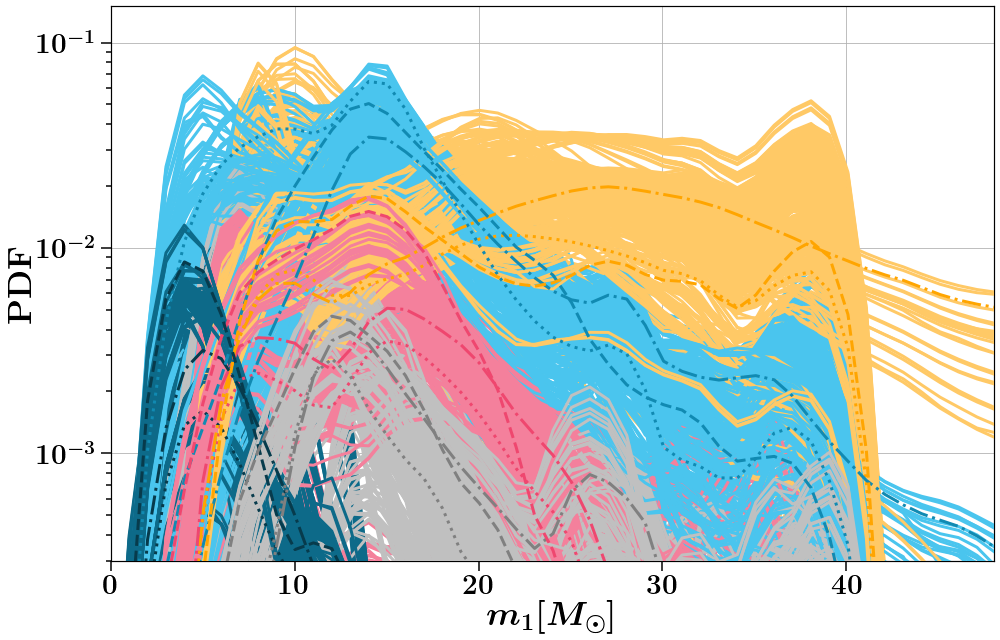

In [19]:
## writing here 



fig, ax = plt.subplots(1,1, figsize=(14,9))#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[0:]):

# for ind_BPS, BPSmodel in enumerate(['A']):
    
    print('running model %s'%BPSmodel)
    
    
    # CHIRP MASS 
    print('at mass_1_LVK')
#     print('at chirp mass')
    bw=0.85
    ylim_threshold = 0.0004       
    xparam = 'mass_1_LVK'
#     xparam = 'chirp_mass_LVK'
    plotYlog = False
    xlim, ylim = [0, 48], [0.0, 2.03]

    plotYlog = True
    ylim = [0.0003, 0.15]
    ax = plot_FC_distribution(axe=ax, xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)






xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30

# ax[2,1].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
# ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
# ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')

    
plt.tight_layout()  
# plt.subplots_adjust(wspace=0.2, hspace=0.1)



plt.savefig('./m1LVK_panel.pdf', transparent=False, bbox_inches="tight",  format='pdf')
plt.savefig('./m1LVK_panel.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











In [ ]:
[21.13608489 10.0464932  12.86334076 ...  3.81552635  3.65272609
  3.86739222]
(8371398,)

running model A
at mass_1_LVK
[33.4712  17.0417  14.9915  ...  5.15439  5.54399  5.15051]
(8371398,)
now at channel:  classic

In [ ]:
running model A
at chirp mass
[21.13608489 10.0464932  12.86334076 ...  3.81552635  3.65272609
  3.86739222]
(8371398,)
now at channel:  classic
now at channel:  stable B no CEE
now at channel:  immediate CE
running model B
at chirp mass
[21.59870452  9.69384928  9.8673975  ...  3.16114459  3.28597739
  2.81796725]
(8616008,)
now at channel:  classic
now at channel:  stable B no CEE
now at channel:  immediate CE

In [ ]:
## new 



fig, ax = plt.subplots(1,1, figsize=(14,9))#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[0:]):

# for ind_BPS, BPSmodel in enumerate(['A']):
    
    print('running model %s'%BPSmodel)
    
    
    # CHIRP MASS 
    print('at chirp mass')
    bw=0.85
    ylim_threshold = 0.0004       
    xparam = 'chirp_mass_LVK'
    plotYlog = False
    xlim, ylim = [0, 38], [0.0, 1.03]

    plotYlog = True
    ylim = [0.0003, 0.15]
    ax = plot_FC_distribution(axe=ax, xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)






xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30

# ax[2,1].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
# ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
# ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')

    
plt.tight_layout()  
# plt.subplots_adjust(wspace=0.2, hspace=0.1)



# plt.savefig('./super_FC_split_panel.pdf', transparent=False, bbox_inches="tight",  format='pdf')
# plt.savefig('./super_FC_split_panel.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











In [ ]:




fig, ax = plt.subplots(1,1, figsize=(14,10))#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[0:2]):

# for ind_BPS, BPSmodel in enumerate(['A']):
    
    print('running model %s'%BPSmodel)
    
    
        ## MASS 1##
    print('at mass 1 LVK')
    xparam = 'mass_1_LVK'
    ylim_threshold = 0.0004
    bw = 0.85
    plotYlog = False
    xlim, ylim = [0, 40], [0.0, 1.03]
#     ax[0,1] = plot_FC_distribution(axe=ax[0,1], xparam=xparam, BPSmodelName=BPSmodel, mode='notMRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)
#     ax[1,1] = plot_FC_distribution(axe=ax[1,1], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    plotYlog = True
    ylim = [0.0003, 0.15]

    ax = plot_FC_distribution(axe=ax, xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)






xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30

# ax[2,1].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
# ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
# ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')

    
plt.tight_layout()  
# plt.subplots_adjust(wspace=0.2, hspace=0.1)



# plt.savefig('./super_FC_split_panel.pdf', transparent=False, bbox_inches="tight",  format='pdf')
# plt.savefig('./super_FC_split_panel.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











In [ ]:




fig, ax = plt.subplots(1,1, figsize=(14,10))#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[0:2]):

# for ind_BPS, BPSmodel in enumerate(['A']):
    
    print('running model %s'%BPSmodel)
    
    
    # CHIRP MASS 
    print('at chirp mass')
    bw=0.85
    ylim_threshold = 0.0004       
    xparam = 'chirp_mass_LVK'
    plotYlog = False
    xlim, ylim = [0, 38], [0.0, 1.03]

    plotYlog = True
    ylim = [0.0003, 0.15]
    ax = plot_FC_distribution(axe=ax, xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)






xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30

# ax[2,1].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
# ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
# ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')

    
plt.tight_layout()  
# plt.subplots_adjust(wspace=0.2, hspace=0.1)



# plt.savefig('./super_FC_split_panel.pdf', transparent=False, bbox_inches="tight",  format='pdf')
# plt.savefig('./super_FC_split_panel.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











In [ ]:




fig, ax = plt.subplots(3,3, figsize=(30,8), gridspec_kw={"height_ratios":[1, 1, 2.5], "width_ratios":[1, 1, 1]})#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[:2]):

    
    print('running model %s'%BPSmodel)

        ## MASS 1##
    print('at mass 1 LVK')
    xparam = 'chirp_mass_LVK' #'mass_1_LVK'
    ylim_threshold = 0.0004
    bw = 0.85
    plotYlog = False
    xlim, ylim = [0, 45], [0.0, 1.03]
#     ax[0,1] = plot_FC_distribution(axe=ax[0,1], xparam=xparam, BPSmodelName=BPSmodel, mode='notMRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)
#     ax[1,1] = plot_FC_distribution(axe=ax[1,1], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    plotYlog = True
    ylim = [0.0003, 0.15]
    ax[2,0] = plot_FC_distribution(axe=ax[2,0], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)

        

xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30


plt.tight_layout()  
plt.subplots_adjust(wspace=0.2, hspace=0.1)

# plt.savefig('./single_FC_split_panel.pdf', transparent=False, bbox_inches="tight",  format='pdf')
# plt.savefig('./single_FC_split_panel.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











# OLD CODE 

In [ ]:


channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}

channelColorDict_lighter = {1:adjust_lightness(color='#118AB2', amount=1.6), 2:adjust_lightness(color='#EF476F', amount=1.4), 3:adjust_lightness(color='#FFD166', amount=1.2), 4:adjust_lightness(color='#073B4C', amount=1.8), 0:adjust_lightness(color='gray', amount=1.5)}


def plot_FC_distribution(axe='None', xparam='chiEff', BPSmodelName='A', mode='pdf',\
                          spin_threshold='None', bw=0.01, xlim=[0,1], ylim=[0,1],\
                          plotYlog='False', ylim_threshold=0.02):#, mssfr='112'):
    
    fs_l = 28 # label fontsize
    
    colors = ['#1f77b4', '#ff7f0e']
    colors_lighter = [adjust_lightness(color=colors[0], amount=2.2),adjust_lightness(color=colors[1], amount=1.7)]

    DCOtype='BBH'
    # path for files 
    path_ = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
    
    fdata = h5.File(path, 'r')
    massCO_ZAMSM1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
    massCO_ZAMSM2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
    # M1 will be the most massive, M2 the least massive compact object. 
    massCO_LVKM1, massCO_LVKM2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    MassRatioCO_LVK = massCO_LVKM2/massCO_LVKM1
    
    seedsDCO  = fdata['doubleCompactObjects']['seed'][...].squeeze()  # get the seeds in the DCO file 
    seedsSN   = fdata['supernovae']['randomSeed'][...].squeeze()    # get the seeds in the SN file 
    indices   = np.sort(np.unique(seedsSN[1::2], return_index=True)[1])
    maskSNdco = np.in1d(seedsSN,  seedsDCO) # mask in the SNe files the SNe that correspond to our DCO
    whichSN   = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]  # this is 1 if the initially primary star goes SN and 2 if the secondary goes supernova     
    whichSN2  = whichSN[1::2][indices]

    # either SN2 = primary (1) and M1 is > M2, or SN2 = secondary & M1 < M2 
    # this takes into account (first term) rejuvenation 
    mask_MRR = ((whichSN2==1) & (massCO_ZAMSM1>massCO_ZAMSM2) ) | ((whichSN2==2) & (massCO_ZAMSM1<massCO_ZAMSM2)) 

    
    
    # obtain formation channels 
    seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
    channels = identify_formation_channels(seeds=seeds, file=fdata)
    
    
    
    del massCO_ZAMSM1
    del massCO_ZAMSM2
    del whichSN2
    del whichSN
    del maskSNdco
    del indices
    del seedsSN
    del seedsDCO


    
    if (mode in ['spin_PDF', 'spin_fraction', 'spinOne_fraction', 'spinTwo_fraction', 'm1spin_or_m2spin_fraction', 'spin_CDF' ]) | (xparam in ['chi_of_spinning_BH', 'chi_effective', 'log10_t_delay']):
        spin = COspin(data_path=path, state='he_depletion')  # set class 
        spin.setCOMPASData() # reads in the COMPAS DCO parameters 
        spinZAMSM1, spinZAMSM2  = spin.BaveraSpin() #ZAMS M1 SPIN 

        spinLVKM1, spinLVKM2 = np.zeros_like(spinZAMSM1), np.zeros_like(spinZAMSM1)
        spinLVKM1[mask_MRR] = spinZAMSM2[mask_MRR]  # MRR so M1 comes from M2ZAMS, we assign it spin from M2ZAMS
        spinLVKM1[~mask_MRR] = spinZAMSM1[~mask_MRR]  # no MRR so M1 comes from M1ZAMS, we assign it spin from M1ZAMS
        spinLVKM2[mask_MRR] = spinZAMSM1[mask_MRR]   # MRR so M2 comes from M1ZAMS, we assign it spin from M1ZAMS
        spinLVKM2[~mask_MRR] = spinZAMSM2[~mask_MRR]   # no MRR so M2 comes from M2ZAMS, we assign it spin from M2ZAMS     

        # spin_threshold = 0.05 # definition of "spinning BH"
        mask_LVKM1_spinning = (spinLVKM1 > spin_threshold ) 
        mask_LVKM2_spinning = (spinLVKM2 > spin_threshold ) # definition of "spinning BH"
        mask_anySpin = (spinLVKM1 > spin_threshold ) | (spinLVKM2 > spin_threshold )    

    

    if xparam=='chirp_mass_LVK':
        param_x = chirpmass(massCO_LVKM1, massCO_LVKM2)
        nameX = r'$\mathcal{M}_{\rm{c}} \ [M_{\odot}]$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(1,100,1000)

    elif xparam=='mass_ratio_LVK':
        param_x = MassRatioCO_LVK
        nameX = r'$q$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-0.2,1.2,1000)
        
    elif xparam=='chi_of_spinning_BH':
        param_x = spinLVKM1 + spinLVKM2

        nameX = r'$\chi_{\rm{i}}$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-0.2,2,1000)  

        
    elif xparam=='chi_effective':
        param_x = ((spinLVKM1*massCO_LVKM1) + (spinLVKM2*massCO_LVKM2)) / (massCO_LVKM1+massCO_LVKM2)
        nameX = r'$\chi_{\rm{eff}}$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-0.2,2,1000)          
        
    elif xparam=='log10_t_delay':
        param_x = (fdata['doubleCompactObjects']['tform'][...].squeeze() +  fdata['doubleCompactObjects']['tc'][...].squeeze() ) / 1000 # divide by 1000 to make it in [Gyr]
        param_x = np.log10(param_x)
        nameX = r'$t_{\rm{delay}} \ [\rm{Gyr}]$'
        nameY = r'\textbf{PDF}'  
        xx = np.linspace(-4,2,1000)  

    
    if (mode=='MRR_PDF') | (mode=='spin_PDF'):
        nameY = r'\textbf{PDF}'
    elif (mode=='MRR_fraction'):
        nameY = r'$\rm{f}_{\rm{channel}}$'
    elif (mode=='notMRR_fraction'):
        nameY = r'$\rm{f}_{\rm{non MRR}}$'
    elif (mode=='spin_fraction'):
        nameY =   r'$\rm{f}_{\chi_{1} > %s}$'%spin_threshold
    elif (mode=='m1spin_or_m2spin_fraction'):
        nameY =   r'$\rm{f}_{\chi_{\rm{i}} > %s}$'%spin_threshold 
    elif (mode=='MRR_CDF') | (mode=='spin_CDF'):
        nameY = r'\textbf{CDF}'
    elif (mode=='spinOne_fraction'):
        nameY =   r'$\rm{f}_{\chi_{1} > %s}$'%spin_threshold
    elif (mode=='spinTwo_fraction'):
        nameY =   r'$\rm{f}_{\chi_{2} > %s}$'%spin_threshold
    else:
        raise ValueError("the provided `mode` is not recognized, the value given is %s"%mode)
        
    
    estimator = FFTKDE(kernel='biweight', bw=bw)
    
    if plotYlog==True:       
        axe.set_yscale('log')
        
        
        

    for nrC, Channel in enumerate(list(np.unique(channels))): 
        
        
        mask_MRR = (channels==Channel)
        c_FC = channelColorDict[Channel]
        colors_lighter_FC =  channelColorDict_lighter[Channel]
#         print('now at channel', Channel)
    
#         for ind_mssfr, mssfr in enumerate(MSSFRnameslist[0:]):
        for ind_mssfr, mssfr in enumerate(MSSFRnameslist[0:]):    

            ls_ = '-'
            Highlight = False
            if ((mssfr in ['123']) & (BPSmodelName in ['K'])):
                ls_ = ':'
                Highlight = True
            elif  ((mssfr in ['312']) & (BPSmodelName in ['T'])):
                ls_ = '--'
                Highlight = True
            elif ((mssfr in ['231']) & (BPSmodelName in ['O'])):
                ls_ = '-.'
                Highlight = True




            ### read in MSSFR weights: ###
            fparam_key = 'weights_detected'
            weightheader = 'w_' + mssfr
            weights_ = fdata[fparam_key][weightheader][...].squeeze()
            w = weights_

            if (mode=='MRR_PDF') | (mode=='MRR_fraction') |  (mode=='notMRR_fraction') : 
#                 yy_nonMRR = estimator.fit(param_x[~mask_MRR], weights=w[~mask_MRR]).evaluate(xx)
                yy_MRR = estimator.fit(param_x[mask_MRR], weights=w[mask_MRR]).evaluate(xx) 
                yy_total = estimator.fit(param_x, weights=w).evaluate(xx) 
        
#                 rel_weight_nonMRR = np.sum(w[~mask_MRR]) / (np.sum(w))
                rel_weight_MRR    = np.sum(w[mask_MRR])  / (np.sum(w))
#                 yy_nonMRR *= rel_weight_nonMRR
                yy_MRR *= rel_weight_MRR


            elif mode in ['spin_PDF', 'spin_fraction', 'spinOne_fraction', 'spinTwo_fraction']:
#                 yy_nonMRR = estimator.fit(param_x[mask_LVKM2_spinning], weights=w[mask_LVKM2_spinning]).evaluate(xx)
                yy_MRR = estimator.fit(param_x[mask_LVKM1_spinning], weights=w[mask_LVKM1_spinning]).evaluate(xx)
                yy_total = estimator.fit(param_x, weights=w).evaluate(xx)
        
#                 rel_weight_nonMRR = np.sum(w[mask_LVKM2_spinning]) / (np.sum(w))
                rel_weight_MRR    = np.sum(w[mask_LVKM1_spinning])  / (np.sum(w))
#                 yy_nonMRR *= rel_weight_nonMRR
                yy_MRR *= rel_weight_MRR


            ## IF WE ARE PLOTTING CDFs
            elif (mode=='MRR_CDF') | (mode=='spin_CDF'):
                if Highlight==True:
#                     axe.hist(param_x[~mask_MRR], bins=10000, color=colors[0], lw=3, zorder=15, alpha=1, ls=ls_ , density=True, weights=weights_[~mask_MRR], cumulative=True, histtype='step')
                    axe.hist(param_x[mask_MRR],  bins=10000, color= c_FC, lw=3, zorder=16, alpha=1, ls=ls_,   density=True, weights=weights_[mask_MRR],  cumulative=True, histtype='step')
                else:
#                     axe.hist(param_x[~mask_MRR], bins=10000, color=colors_lighter[0], lw=1.5, zorder=5, alpha=1, ls=ls_, density=True, weights=weights_[~mask_MRR], cumulative=True, histtype='step')
                    axe.hist(param_x[mask_MRR],  bins=10000, color=colors_lighter_FC, lw=1.5, zorder=6, alpha=1, ls=ls_,  density=True, weights=weights_[mask_MRR],  cumulative=True, histtype='step')

                axe = layoutAxes(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=5, fontsize=fs_l, labelSizeMajor=fs_major)                        


            ### PLOTTING ###
            ## IF WE ARE PLOTTING PDFs
            if (mode=='MRR_PDF') | (mode=='spin_PDF'):
                if Highlight==True:
#                     axe.plot(xx, yy_nonMRR, color=colors[0], lw=3, zorder=15, alpha=1, ls=ls_)
                    axe.plot(xx, yy_MRR,    color=c_FC, lw=3, zorder=16, alpha=1, ls=ls_)
                else:
#                     axe.plot(xx, yy_nonMRR, color=colors_lighter[0], lw=1.5, zorder=5, alpha=1, ls=ls_)
                    axe.plot(xx, yy_MRR,    color=colors_lighter_FC, lw=1.5, zorder=6, alpha=1, ls=ls_)

                axe = layoutAxes(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=0, fontsize=fs_l, labelSizeMajor=fs_major)  


            # PLOTTING FRACTION     
            elif mode in ['MRR_fraction', 'spin_fraction',  'notMRR_fraction', 'spinOne_fraction', 'spinTwo_fraction']: 

#                 yy_total = (yy_nonMRR + yy_MRR)
                # in some cases the overall PDF is so small, that the ratio is dominated by some shot noise. So we make those zero. 
                mask_too_small_values =  (yy_MRR < ylim_threshold)
                yy_MRR[mask_too_small_values] = np.zeros(int(np.sum(mask_too_small_values)))
#                 yy_nonMRR[mask_too_small_values] = np.zeros(int(np.sum(mask_too_small_values)))

                if (mode=='MRR_fraction') | (mode=='spin_fraction') | (mode=='spinOne_fraction'):
                    ratio = yy_MRR/yy_total

#                 elif (mode=='notMRR_fraction') | (mode=='spinTwo_fraction'): 
#                     ratio = yy_nonMRR/yy_total
#                     color = colors[0]
#                     color_lighter = colors_lighter[0]

                if Highlight==True:
                    axe.plot(xx, ratio,     color=c_FC,          lw=3,  zorder=20, alpha=1, ls=ls_)
                else:
                    axe.plot(xx, ratio,     color=colors_lighter_FC,  lw=1.5, zorder=6, alpha=1, ls=ls_)

                # remove labels and ticks  on X axe
                axe = layoutAxesNoXlabel(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=5, fontsize=fs_l, labelSizeMajor=fs_major)
                for tick in axe.xaxis.get_major_ticks():
                    tick.tick1line.set_visible(False)
                    tick.tick2line.set_visible(False)
                    tick.label1.set_visible(False)
                    tick.label2.set_visible(False)


            elif (mode=='m1spin_or_m2spin_fraction'):

                yy_total = estimator.fit(param_x, weights=w).evaluate(xx)
                yy_anySpin = estimator.fit(param_x[mask_anySpin], weights=w[mask_anySpin]).evaluate(xx)


                # in some cases the overall PDF is so small, that the ratio is dominated by some shot noise. So we make those zero. 
                mask_too_small_values = (yy_anySpin < ylim_threshold) & (yy_total < ylim_threshold)
                yy_anySpin[mask_too_small_values] = np.zeros(int(np.sum(mask_too_small_values)))            


                if Highlight==True:
                    axe.plot(xx, yy_anySpin*np.sum(w[mask_anySpin]) / (yy_total*np.sum(w)),     color='k',        lw=2, zorder=20, alpha=1, ls=ls_)
                else:
                    axe.plot(xx, yy_anySpin*np.sum(w[mask_anySpin]) / (yy_total*np.sum(w)),     color='lightgray',      lw=2, zorder=6, alpha=1, ls=ls_)


                # remove labels and ticks  on X axe
                axe = layoutAxesNoXlabel(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=5, fontsize=fs_l, labelSizeMajor=fs_major)
                for tick in axe.xaxis.get_major_ticks():
                    tick.tick1line.set_visible(False)
                    tick.tick2line.set_visible(False)
                    tick.label1.set_visible(False)
                    tick.label2.set_visible(False)

    if mode in [ 'MRR_fraction', 'notMRR_fraction', 'spinTwo_fraction', 'spinOne_fraction', 'm1spin_or_m2spin_fraction']:
        axe.set_yticks([ 0.5, 1])
    elif mode in ['MRR_CDF', 'spin_CDF']:
        axe.set_yticks([0.5, 0.75, 1])
        

            
    axe.set_xlim(xlim[0], xlim[1])
    axe.set_ylim(ylim[0], ylim[1])
    axe.grid(True)
    
    


    
    return axe 









In [ ]:




fig, ax = plt.subplots(3,3, figsize=(30,8), gridspec_kw={"height_ratios":[1, 1, 2.5], "width_ratios":[1, 1, 1]})#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[:]):

# for ind_BPS, BPSmodel in enumerate(['A']):
    
    print('running model %s'%BPSmodel)
    
    
    # CHIRP MASS 
    bw=0.85
    ylim_threshold = 0.0004       
    xparam = 'chirp_mass_LVK'
    plotYlog = False
    xlim, ylim = [0, 58], [0.0, 1.03]

#     ax[0,0] = plot_FC_distribution(axe=ax[0,0], xparam=xparam, BPSmodelName=BPSmodel, mode='notMRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    ax[1,0] = plot_FC_distribution(axe=ax[1,0], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    plotYlog = True
    ylim = [0.0003, 0.15]
    ax[2,0] = plot_FC_distribution(axe=ax[2,0], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)



    
    
    
    ## MASS RATIO ##
    xparam = 'mass_ratio_LVK'
    ylim_threshold = 0.001
    bw = 0.01 
    plotYlog = False
    xlim, ylim = [0, 1], [0.0, 1.03]
#     ax[0,1] = plot_FC_distribution(axe=ax[0,1], xparam=xparam, BPSmodelName=BPSmodel, mode='notMRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)
    ax[1,1] = plot_FC_distribution(axe=ax[1,1], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    plotYlog = True
    ylim = [0.001, 9.15]
    ax[2,1] = plot_FC_distribution(axe=ax[2,1], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)



    # chi spin  ##
    ylim_threshold = 0.001
    bw = 0.0051
    xparam = 'chi_of_spinning_BH'
    plotYlog = False
    xlim, ylim = [0.05, 1], [0.0, 1.03] 
#     ax[0,2] = plot_FC_distribution(axe=ax[0,2], xparam=xparam, BPSmodelName=BPSmodel, mode='notMRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)
    
    ax[1,2] = plot_FC_distribution(axe=ax[1,2], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    plotYlog = False
    ylim = [0.5, 1.03]
    ax[2,2] = plot_FC_distribution(axe=ax[2,2], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_CDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)




xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30

# ax[2,1].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
# ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
# ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')

    
plt.tight_layout()  
plt.subplots_adjust(wspace=0.2, hspace=0.1)



plt.savefig('./super_FC_split_panel2.pdf', transparent=False, bbox_inches="tight",  format='pdf')
plt.savefig('./super_FC_split_panel2.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from corner import corner

# rvs(mean=None, cov=1, size=1, random_state=None)


y = multivariate_normal.rvs(size=100000, mean=[0,0])

corner(y);





# fig1 = plt.figure()
# ax = fig1.add_subplot(111)
# ax.plot(x, y)